In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('micro credit default.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data=data.drop(['Unnamed: 0'],1)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
data.shape

(209593, 36)

In [5]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
#disdata=data.drop(['pcircle','pdate','msisdn','label'],1)
#disdata.head()

In [9]:
data['pcircle'].unique()

array(['UPW'], dtype=object)

In [10]:
data=data.drop(['pcircle'],1)

In [11]:
data['pdate_Day']=pd.to_datetime(data.pdate,format="%Y/%m/%d").dt.day

In [12]:
data['pdate_month']=pd.to_datetime(data.pdate,format="%Y/%m/%d").dt.month

In [13]:
data=data.drop(['pdate'],axis=1)

In [14]:
data.shape

(209593, 36)

In [15]:
X=data.drop(['msisdn','label'],1)
y=data['label']

droping  msisdn this feature is mobile no of user and mobile no cannot be object data type as seen after applying  info method 

In [16]:
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_Day,pdate_month
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


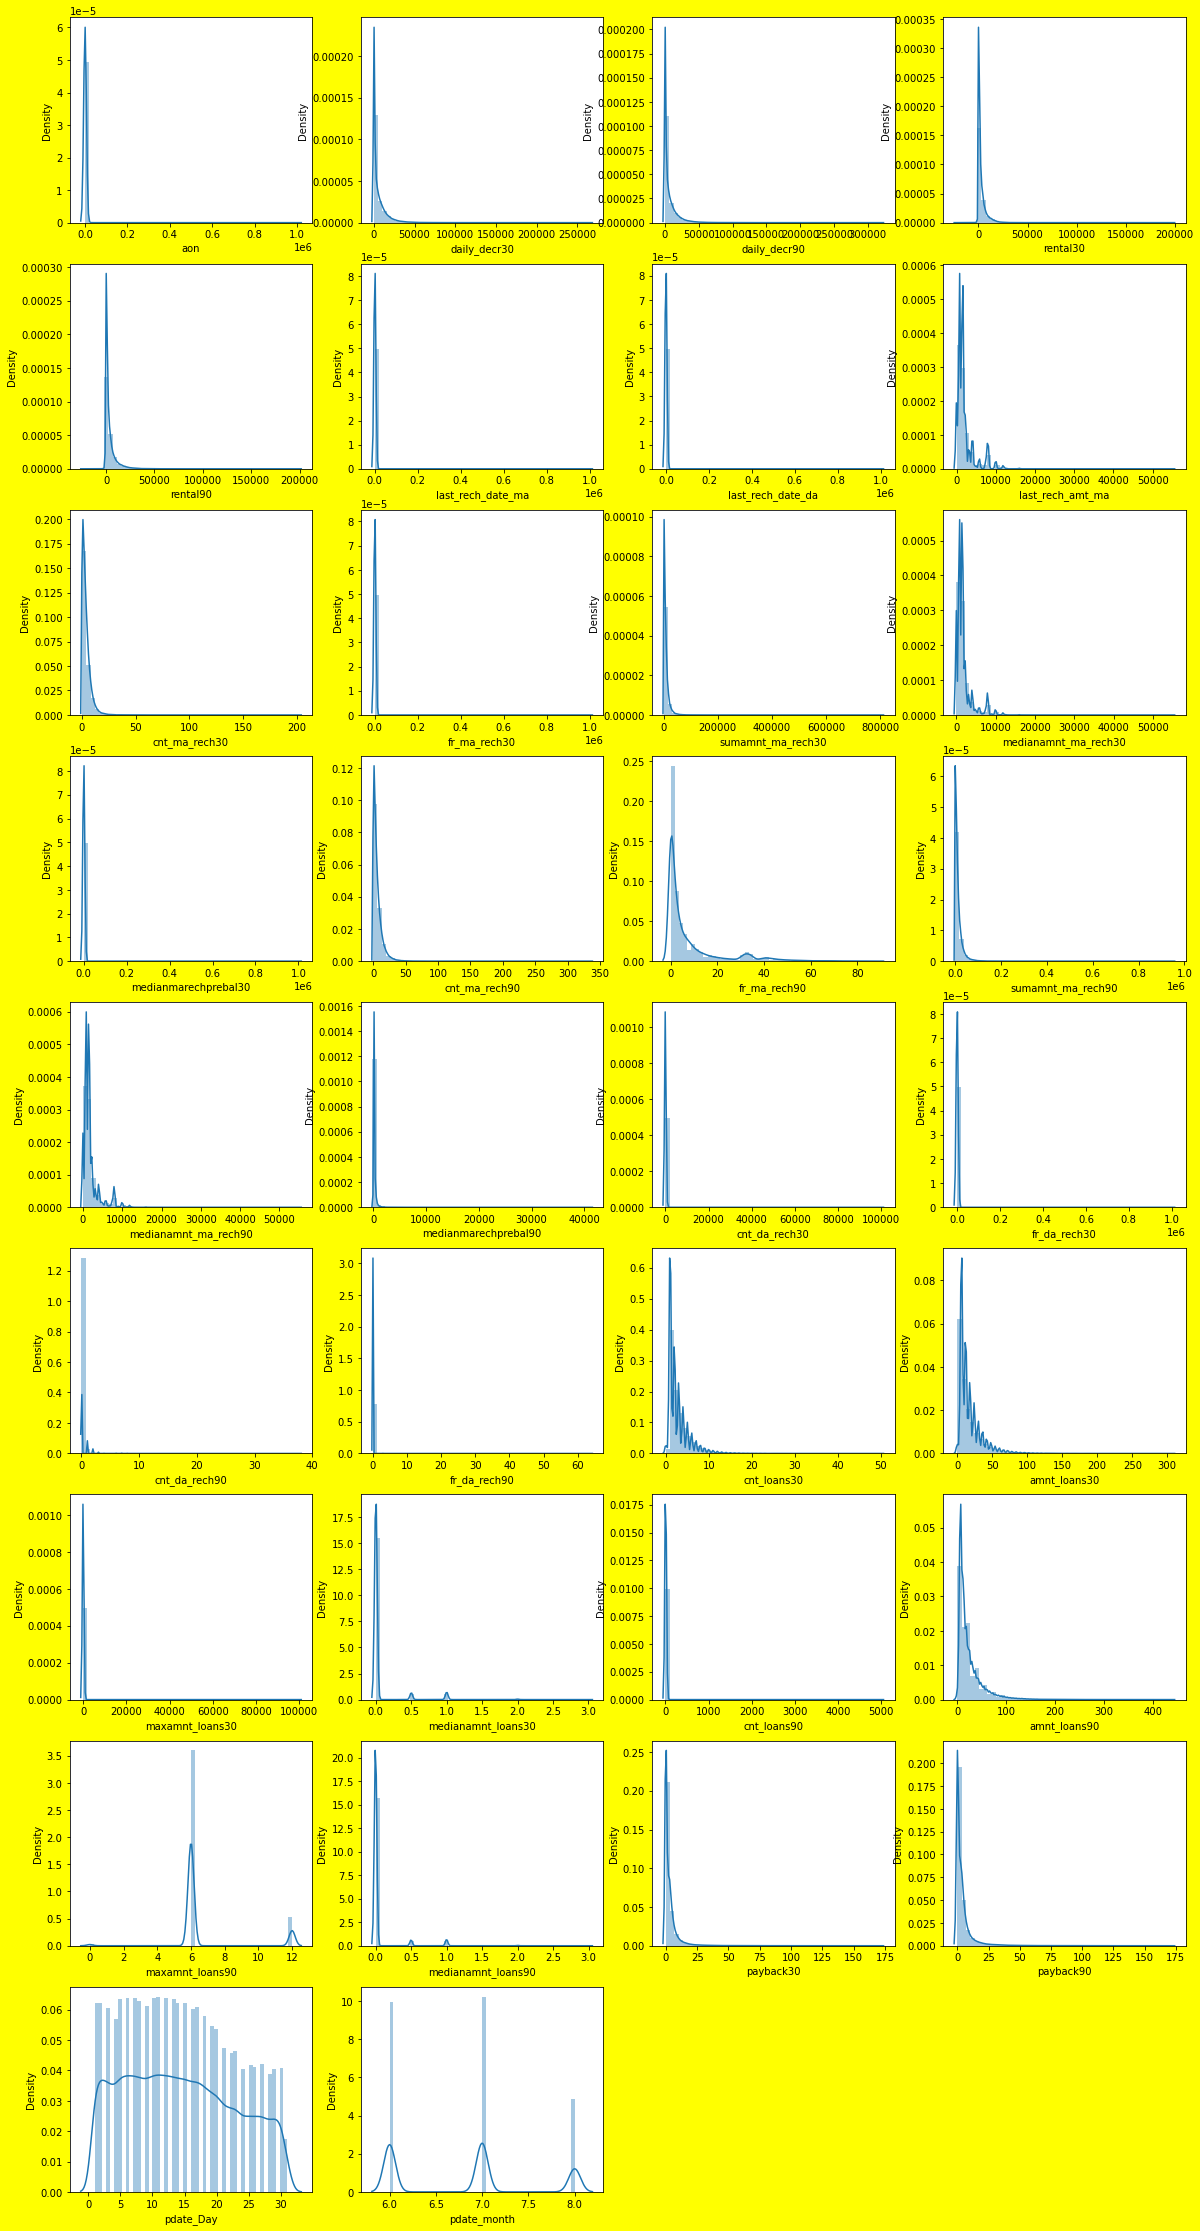

In [17]:
plt.figure(figsize=(20,40),facecolor='yellow')
plotnumber=1
for column in X:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [18]:
X.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

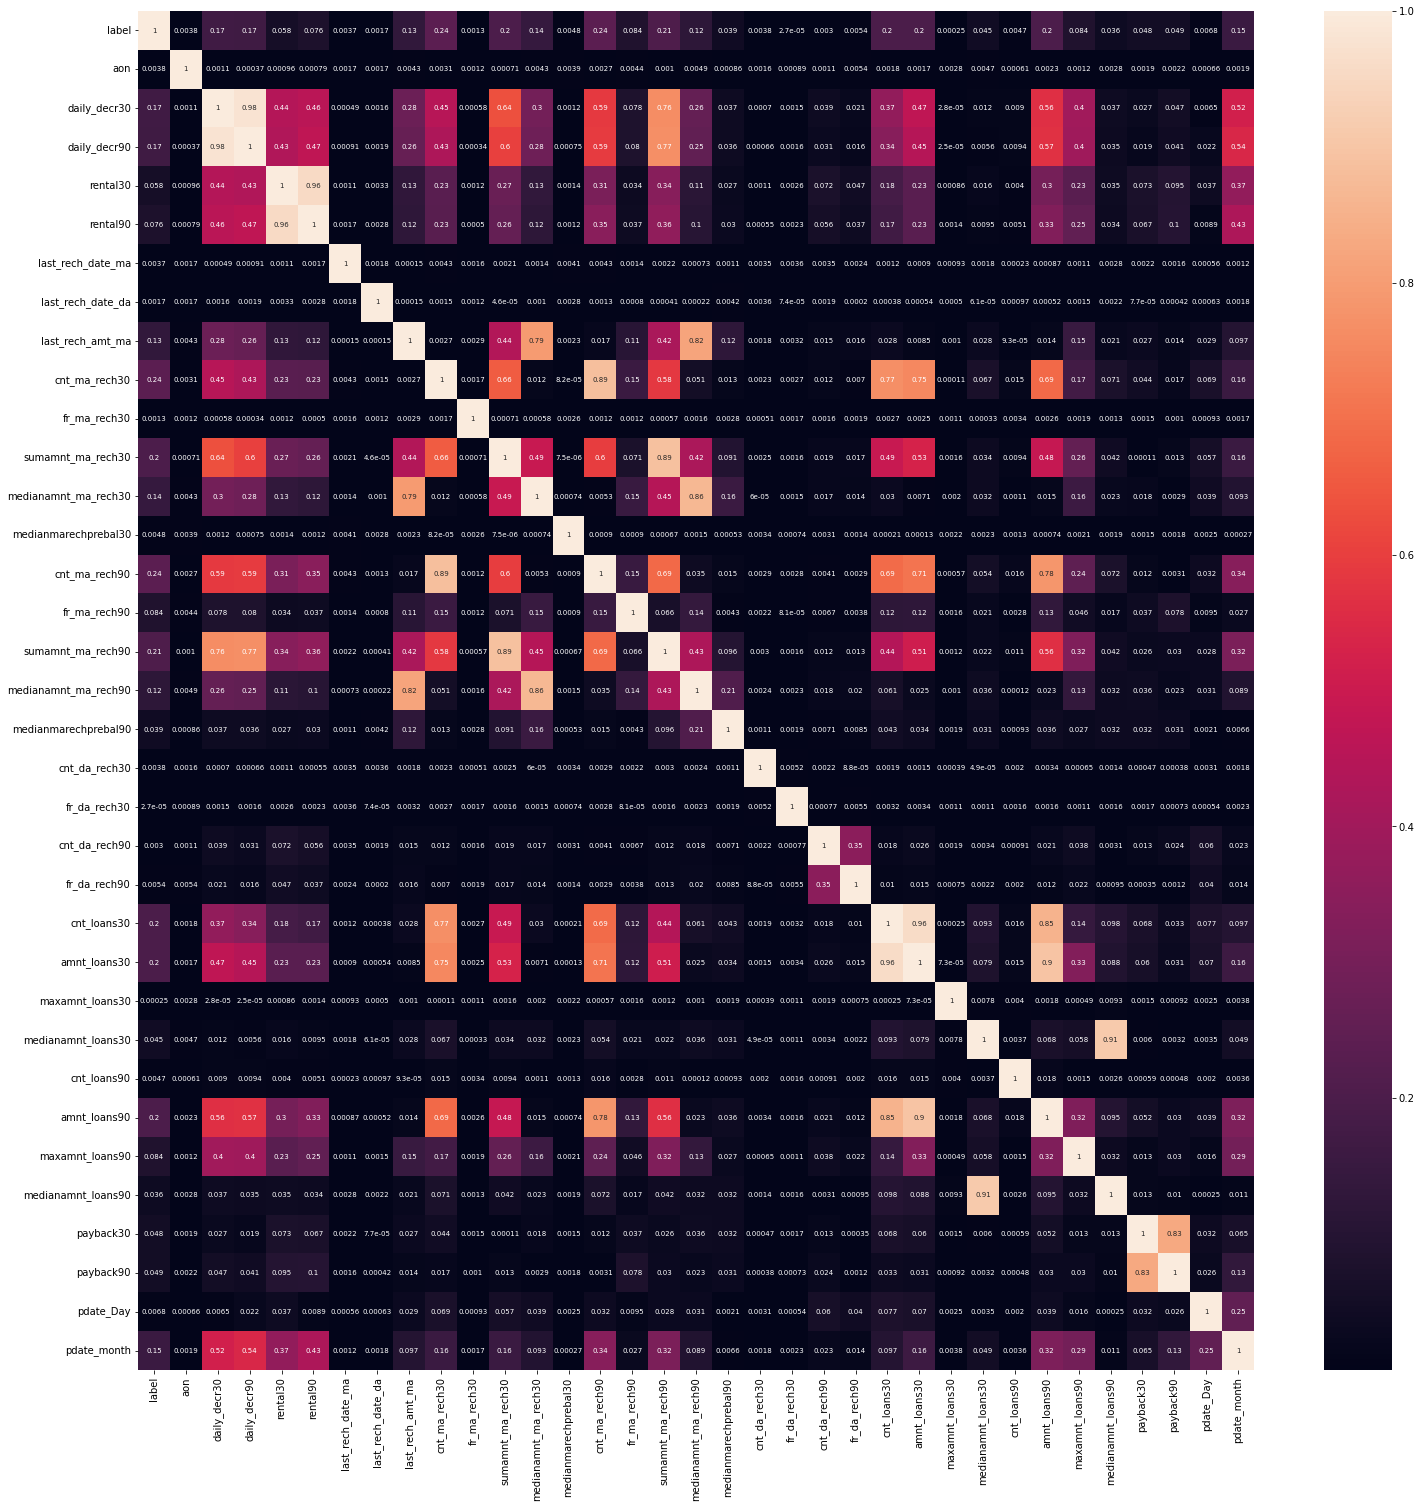

In [19]:
data.corr()
data_corr=data.corr().abs()
plt.figure(figsize=(25,25))
sns.heatmap(data_corr,annot=True,annot_kws={'size':7})
plt.show()

From heatmap following points can be observed 

amnt_loans30 and amnt_loan90 are highly correlated with each other.
  medianamnt_loans30 and medianamnt_loans_90 are corelated with each other.
  daily_decr30 and daily_decr90 are highly corelated with each other.
  rental30 and rental90 are highly corelated with each other.                
  cnt_ma_rech30 and cnt_ma_rech90 are correlated with each other.
  cnt_loans30 and amnt_loans30 are correlated with each other 


Text(0.5, 1.0, 'Correlation with target Variable that is label column')

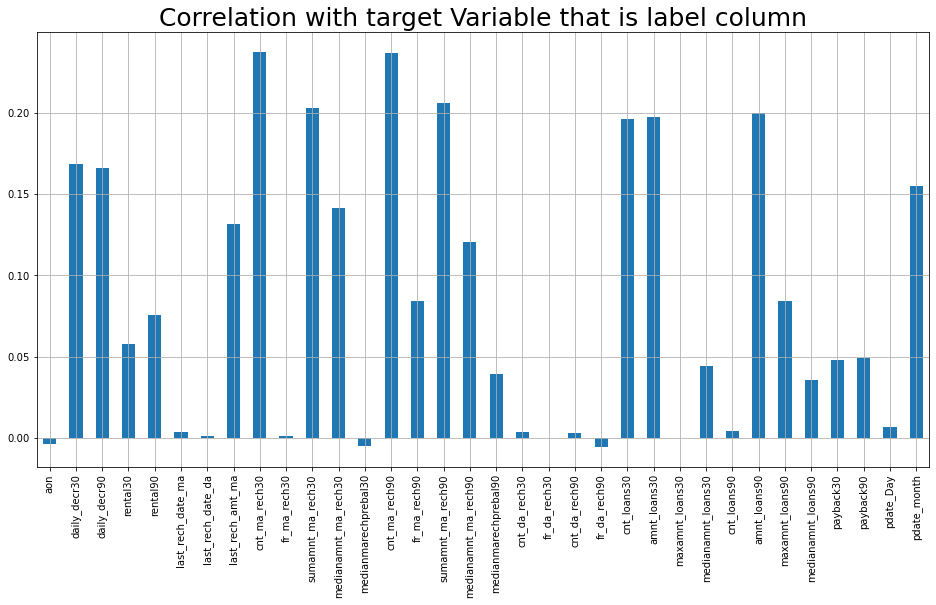

In [20]:
plt.figure(figsize=(16,8))
#data.drop('label','msisdn',axis=1).corrwith(data['label']).plot(kind='bar',grid=True)
X.corrwith(data['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

In [21]:
data=data.drop(['medianamnt_loans90','daily_decr90','rental30','cnt_loans30'],1)


In [22]:
data=data.drop(['msisdn'],1)

In [23]:
data

,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pdate_Day,pdate_month
0,0,272.0,3055.050000,260.13,2.0,0.0,1539,2,21.0,3078.0,...,12,6.0,0.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,12,12.0,0.0,1.0,12,12,0.000000,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,6,6.0,0.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,12,6.0,0.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,42,6.0,0.0,7.0,42,6,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,...,12,6.0,0.0,2.0,12,6,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,...,18,6.0,0.0,3.0,18,6,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,8893.20,3.0,0.0,1539,5,8.0,9334.0,...,42,12.0,0.0,6.0,54,12,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,984.58,2.0,38.0,773,5,4.0,12154.0,...,18,12.0,0.0,3.0,24,12,0.000000,10.500000,25,7


In [24]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
print(np.where(z<3))
print(data.shape)
data=data[(z<3).all(axis=1)]
data

(array([     0,      0,      0, ..., 209592, 209592, 209592], dtype=int64), array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))
(209593, 31)


,label,aon,daily_decr30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pdate_Day,pdate_month
0,0,272.0,3055.050000,260.13,2.0,0.0,1539,2,21.0,3078.0,...,12,6.0,0.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,12,12.0,0.0,1.0,12,12,0.000000,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,6,6.0,0.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,12,6.0,0.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,42,6.0,0.0,7.0,42,6,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,...,12,6.0,0.0,2.0,12,6,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,...,18,6.0,0.0,3.0,18,6,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,8893.20,3.0,0.0,1539,5,8.0,9334.0,...,42,12.0,0.0,6.0,54,12,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,984.58,2.0,38.0,773,5,4.0,12154.0,...,18,12.0,0.0,3.0,24,12,0.000000,10.500000,25,7


In [25]:
data.skew()

label                   -2.098184
aon                      0.957086
daily_decr30             1.976841
rental90                 2.284049
last_rech_date_ma        3.114586
last_rech_date_da       10.371111
last_rech_amt_ma         2.121472
cnt_ma_rech30            1.182171
fr_ma_rech30             2.004002
sumamnt_ma_rech30        1.618665
medianamnt_ma_rech30     2.322274
medianmarechprebal30    10.504684
cnt_ma_rech90            1.310797
fr_ma_rech90             1.991449
sumamnt_ma_rech90        1.715735
medianamnt_ma_rech90     2.369974
medianmarechprebal90     3.696838
cnt_da_rech30           51.002760
fr_da_rech30             0.000000
cnt_da_rech90            6.931065
fr_da_rech90             0.000000
amnt_loans30             1.490396
maxamnt_loans30         53.725043
medianamnt_loans30       5.318884
cnt_loans90              1.708363
amnt_loans90             1.687675
maxamnt_loans90          2.651607
payback30                2.610247
payback90                2.531331
pdate_Day     

In [26]:
data['label'].value_counts()

1    140497
0     22508
Name: label, dtype: int64

From value count function it can be clearly seen that data is imbalanced 1 count is more than 0 count,for balancing the data applying SMOTE funcation on the data.


In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
X1=data.drop(columns=['label'])
y1=data['label']

In [29]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y1,test_size=.25,random_state=49)
y_train.head()

121701    1
17132     1
9671      1
205848    1
74765     1
Name: label, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE 

In [32]:
over_sample=SMOTE()
x_train_ns,y_train_ns=over_sample.fit_resample(x_train,y_train)
#print("The number of classes before fit {}".format(Counter(y_train))) 
#print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [33]:
y_train.value_counts()

1    105386
0     16867
Name: label, dtype: int64

In [34]:
y_train_ns.value_counts()

1    105386
0    105386
Name: label, dtype: int64

In [35]:
y_test.value_counts()

1    35111
0     5641
Name: label, dtype: int64

In [36]:
x_test

array([[-0.98649308, -0.66530417, -0.69177331, ..., -0.6491878 ,
        -1.22816734, -1.00469303],
       [-0.06042563, -0.65517249, -0.36702594, ...,  0.62972763,
         0.07895258, -1.00469303],
       [ 0.81329888, -0.66276044, -0.53813442, ...,  0.25951527,
        -0.99050917, -1.00469303],
       ...,
       [ 0.22746056, -0.66601365, -0.65264667, ..., -0.6491878 ,
        -0.99050917, -1.00469303],
       [ 0.59587435, -0.66485541, -0.69488541, ..., -0.6491878 ,
        -1.4658255 , -1.00469303],
       [-0.78517407, -0.53751252,  0.16288651, ...,  0.49510496,
        -1.58465458,  0.38123852]])

# LOGISTIC REGRESSION

In [37]:
log_reg=LogisticRegression()

log_reg.fit(x_train_ns,y_train_ns)

LogisticRegression()

In [38]:
y_pred=log_reg.predict(x_test)

In [39]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [41]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7434236356497841

In [42]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 4470,  1171],
       [ 9285, 25826]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

In [63]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.79      0.46      5641
           1       0.96      0.74      0.83     35111

    accuracy                           0.74     40752
   macro avg       0.64      0.76      0.65     40752
weighted avg       0.87      0.74      0.78     40752



# Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf=DecisionTreeClassifier()
clf.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier()

In [66]:
clf.score(x_train_ns,y_train_ns)

0.9999810221471542

In [67]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8640802905378877

# KNN CLASSIFIER

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier()

In [70]:
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier()

In [71]:
y_pred2=knn.predict(x_test)
y_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
cfm=confusion_matrix(y_test,y_pred2)
cfm

array([[ 4121,  1520],
       [ 7778, 27333]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred2,digits=2))

              precision    recall  f1-score   support

           0       0.35      0.73      0.47      5641
           1       0.95      0.78      0.85     35111

    accuracy                           0.77     40752
   macro avg       0.65      0.75      0.66     40752
weighted avg       0.86      0.77      0.80     40752



# RANDOM FOREST CLASSIFIER

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier(n_estimators=20, random_state=0)

In [76]:
rfc.fit(x_train_ns, y_train_ns)

RandomForestClassifier(n_estimators=20, random_state=0)

In [77]:
y_pred3 = rfc.predict(x_test)
y_pred3

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [78]:
accuracy=accuracy_score(y_test,y_pred3)
accuracy

0.902655084413035

In [79]:
cfm=confusion_matrix(y_test,y_pred3)
cfm

array([[ 3676,  1965],
       [ 2002, 33109]], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred3,digits=2))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      5641
           1       0.94      0.94      0.94     35111

    accuracy                           0.90     40752
   macro avg       0.80      0.80      0.80     40752
weighted avg       0.90      0.90      0.90     40752



# HYPER PARAMETER TUNING

In [81]:
rc = RandomForestClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [4, 6,8,10,12],
    'min_samples_leaf': [2, 3, 4, 5,],
    'criterion': ["gini", "entropy"]
}

In [84]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rc, 
                           param_grid=params, 
                           cv=6, n_jobs=-1, scoring = "accuracy")

In [85]:
grid_search.fit(x_train_ns, y_train_ns)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='accuracy')

In [86]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=3)

In [87]:
gd=grid_search.best_estimator_

In [88]:
rc = RandomForestClassifier(max_depth=12, min_samples_leaf=3,criterion='gini')

In [89]:
rc.fit(x_train_ns,y_train_ns)

RandomForestClassifier(max_depth=12, min_samples_leaf=3)

In [90]:
rc.score(x_train_ns,y_train_ns)

0.9001575161786195

In [91]:
y_pred4=rc.predict(x_test)

In [92]:
cfm=confusion_matrix(y_test,y_pred4)
cfm

array([[ 4140,  1501],
       [ 4398, 30713]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred4,digits=2))

              precision    recall  f1-score   support

           0       0.48      0.73      0.58      5641
           1       0.95      0.87      0.91     35111

    accuracy                           0.86     40752
   macro avg       0.72      0.80      0.75     40752
weighted avg       0.89      0.86      0.87     40752



Considering the result of RandomForestClassifier algorithm.As it is giving best result.it is showing accuracy about 90 percent.
 Hyper parameter tuning has been applied but it has not improve the accuracy as seen.

In [ ]:
pip install scikit-learn

In [ ]:
pip install scikitplot

In [ ]:
from scikitplot.metrics import plot_roc_curve

In [ ]:

disp=plot_roc_curve(rfc,x_train_ns,y_train_ns)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
disp=plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()